# Advertising

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')    #importing dataset
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape  #checking the shape of dataframe

(200, 5)

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [13]:
df = df.drop('Unnamed: 0',axis=1) #droping the column

In [14]:
df.describe() #for satistical summary

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
df.isnull().sum()   #check for null values

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

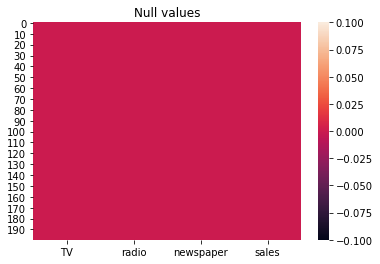

In [16]:
#generating heatmap of null values
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [18]:
df.dtypes  #checking the data types of each column

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [19]:
#lets check for coreleation
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


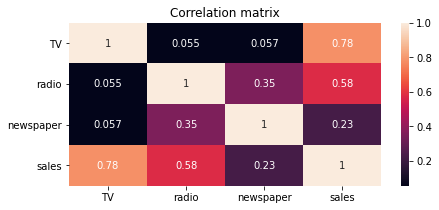

In [21]:
#Correleation heatmap
corr_mat=df.corr()
plt.figure(figsize=[7,3])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation matrix")
plt.show()

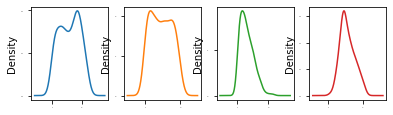

In [22]:
#Cheking data distribution of data
df.plot(kind="density", subplots=True,layout=(6,11), sharex=False, legend= False, fontsize=1, figsize=(18,12))
plt.show()

In [24]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [25]:
#Here skewness is present.
#splitting the independent and target variable columns into x and y to remove skewness.
x=df.drop("sales", axis = 1)
y=df["sales"]

In [26]:
#checking skewness
x.skew()    #here data is highly skewed
#considering the range of (-5,5)

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

In [27]:
#removing skewness using power transform method
from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.skew()  #validating if skewness is removed or not

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

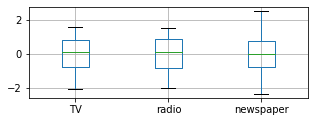

In [29]:
#above result shows skewness is removed
#now checking for outliers
x.iloc[:,0:].boxplot(figsize=[5,2])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [36]:
#applying scaling to normalise data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

In [38]:
#Creating train test split at random state 479
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=79)

#Logistic Regression

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print ("Accuracy",accuracy_score(y_test, predlr)*100)
print (confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

ValueError: Unknown label type: 'continuous'

SyntaxError: invalid syntax (<ipython-input-34-575d5e0b6891>, line 1)